In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'y')

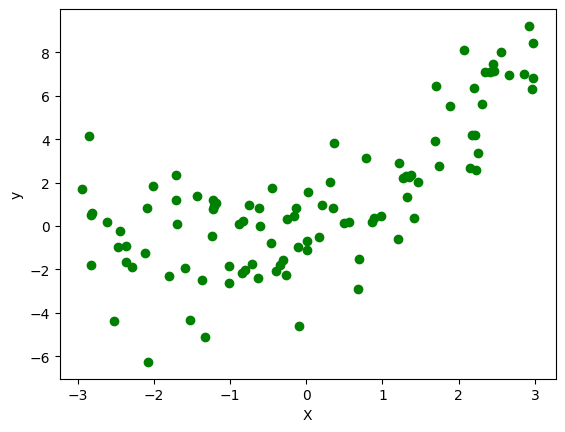

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 * np.random.randn(100,1)
plt.scatter(X, y, color='g')
plt.xlabel('X')
plt.ylabel('y')

In [3]:
# Train Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
## Trying LinReg
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [5]:
from sklearn.metrics import r2_score
y_pred = LinReg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

R2 Score:  0.2933444434490733


Text(0, 0.5, 'y')

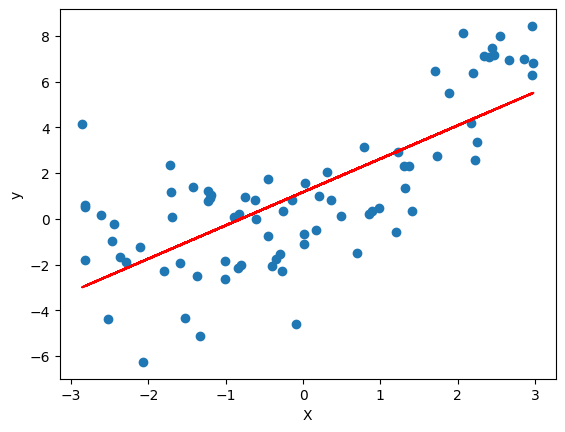

In [6]:
plt.plot(X_train, LinReg.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel('X')
plt.ylabel('y')

In [7]:
## Trying Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [11]:
X_train_poly[:5]

array([[ 1.        , -0.29922162,  0.08953358],
       [ 1.        , -0.6172122 ,  0.3809509 ],
       [ 1.        ,  1.88279645,  3.54492247],
       [ 1.        ,  2.55310376,  6.51833879],
       [ 1.        , -1.3692344 ,  1.87480286]])

In [10]:
PolyReg = LinearRegression()
PolyReg.fit(X_train_poly, y_train)
y_pred = PolyReg.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred)
print(r2_poly)

0.661868074999394


In [13]:
print('Coeff: ', PolyReg.coef_)
print('Intercept: ', PolyReg.intercept_)

Coeff:  [[0.         1.36866564 0.49242793]]
Intercept:  [-0.25905626]


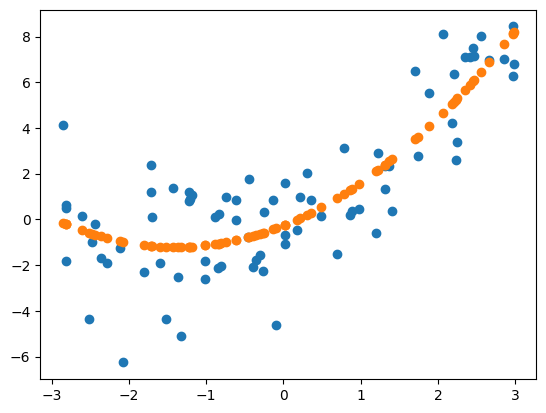

In [16]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, PolyReg.predict(X_train_poly))

[[ 1.         -0.29922162  0.08953358 -0.02679038]
 [ 1.         -0.6172122   0.3809509  -0.23512754]
 [ 1.          1.88279645  3.54492247  6.67436743]
 [ 1.          2.55310376  6.51833879 16.64199526]
 [ 1.         -1.3692344   1.87480286 -2.56704457]]
0.6609521856214772
Coeff:  [[ 0.          1.38812322  0.49248823 -0.00352199]]
Intercept:  [-0.25707663]


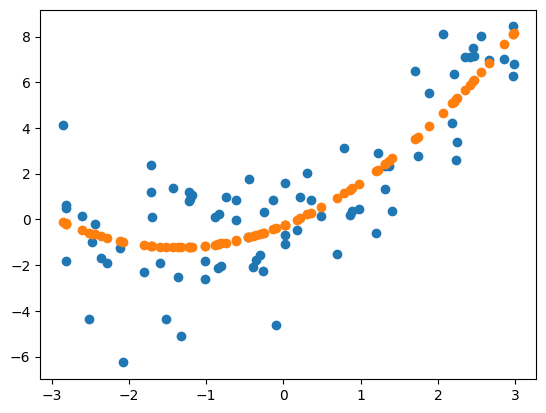

In [18]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly[:5])

PolyReg = LinearRegression()
PolyReg.fit(X_train_poly, y_train)
y_pred = PolyReg.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred)
print(r2_poly)

print('Coeff: ', PolyReg.coef_)
print('Intercept: ', PolyReg.intercept_)

plt.scatter(X_train, y_train)
plt.scatter(X_train, PolyReg.predict(X_train_poly))

## Creating Polynomial Regression Pipeline

In [21]:
print(X_train[:5])
print(y_train[:5])

[[-0.29922162]
 [-0.6172122 ]
 [ 1.88279645]
 [ 2.55310376]
 [-1.3692344 ]]
[[-1.55565483]
 [ 0.84078024]
 [ 5.51601042]
 [ 8.00402608]
 [-2.50201776]]


In [38]:
from sklearn.pipeline import Pipeline

def poly_regression(degree):
  X_new = np.linspace(-3, 3, 200).reshape(200, 1)
  poly_features = PolynomialFeatures(degree=degree, include_bias=True)
  PReg = LinearRegression()
  Poly_Reg_pipeline = Pipeline([('poly_features', poly_features), ('PReg', PReg)])

  Poly_Reg_pipeline.fit(X_train, y_train)
  y_pred_new = Poly_Reg_pipeline.predict(X_new)
  #Plotting results
  plt.scatter(X_train, y_train, color='b')
  plt.scatter(X_test, y_test, color='g')
  plt.plot(X_new, y_pred_new, 'r', label="Degree: " + str(degree), linewidth=3)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend()
  plt.show()

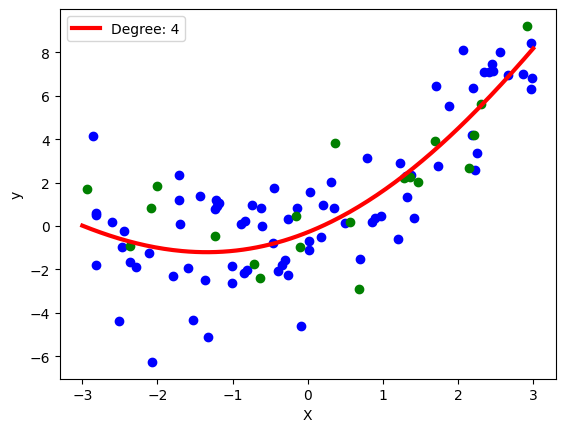

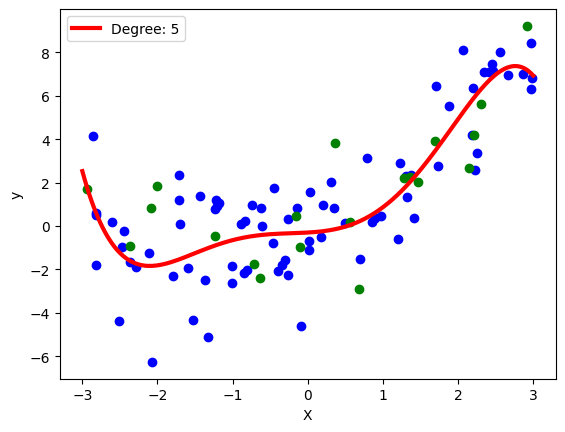

In [51]:
poly_regression(4)
poly_regression(5)